## Question 1 - XOR

In [1]:
import numpy as np

In [2]:
def initialize_network(no_of_hidden_neurons):
    X = np.array([[0,0],[0,1],[1,0],[1,1]])
    y = np.array([0,1,1,0])
    W = []
    a = np.random.normal(0, 1, no_of_hidden_neurons)
    b = np.random.normal(0, 1, no_of_hidden_neurons)
    w0 = np.column_stack((a,b))
    W.append(w0)
    w1 = np.random.normal(0, 1, no_of_hidden_neurons).reshape(1,no_of_hidden_neurons)
    W.append(w1)
    
    return X,y,W

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [4]:
def error(y_head,y):
    return 0.5*(y_head-y)**2

In [5]:
def forward_prop(x,W):
    outputs = []
    a = x.copy()
    layer_outputs = [a.reshape((a.shape[0],1))]
    for w in W:
        z = w.dot(a)
        a = sigmoid(z)
        a = a.reshape((a.shape[0],1))
        layer_outputs.append(a)
    
    return layer_outputs

In [6]:
def back_prop(X,y,W,learning_rate=0.5,no_of_epochs=10000):
    ERR = []
    for _ in range(no_of_epochs):
        gradients = [np.zeros(w.shape) for w in W]
        total_error = 0
        for idx, x in enumerate(X):
            layer_outputs = forward_prop(x,W)
            i = -1
            deltas = [layer_outputs[i] - y[idx]]
            total_error += float(error(layer_outputs[i],y[idx]))
            for w in reversed(W[1:]):
                i = i-1
                current = layer_outputs[i]
                layer_delta = w.T.dot(deltas[0])*current*(1-current)
                a,b = layer_delta.shape[0], 1
                layer_delta = layer_delta.reshape((a,b))
                deltas.insert(0, layer_delta)

            for i in range(len(gradients)):
                gradients[i] = gradients[i] + deltas[i].dot(layer_outputs[i].T)

            '''
            print("Deltas:", deltas)
            print("Layer outputs (a):", layer_outputs)
            print("W:", W)
            print("Grad:", gradients)
            '''

        ERR.append(total_error)
        for i in range(len(W)):
            W[i] = W[i] - learning_rate*(1/len(X))*gradients[i]
            
    return W, ERR

In [7]:
X,y,W = initialize_network(9)
W_end, ERR = back_prop(X,y,W,learning_rate=1,no_of_epochs=10000)
for x in X:
    result = forward_prop(x,W_end)
    res = result[-1]
    print(res)

[[0.0011694]]
[[0.99905059]]
[[0.99871612]]
[[0.00107099]]


Final Error: 2.5326686759191607e-06


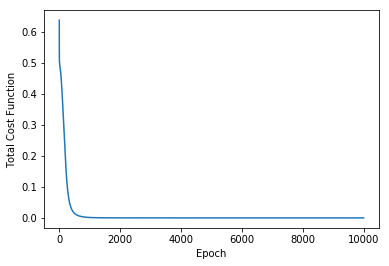

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.arange(len(ERR)),ERR)
plt.xlabel('Epoch')
plt.ylabel('Total Cost Function')
plt.show()